In [1]:
import pandas as pd           
import praw                   
import re                     
import datetime as dt
import seaborn as sns
import requests
import json
import sys
import time        
import numpy as np

In [2]:
wsb = pd.read_csv("../Data/wsb_cleaned.csv")

In [3]:
wsbc=wsb.sort_values(by=['num_comments'],ascending=False)

In [4]:
wsbc.head()

,Unnamed: 0,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
104195,104195,WSB Saturday Chat,zjz,2020-04-18 21:27:15,This definitely isn't a ploy to inflate our co...,https://www.reddit.com/r/wallstreetbets/commen...,0.96,10358,42,100000,1,True,False,False,g3vew6,1.587245e+09,"<!-- SC_OFF --><div class=""md""><p>This definit...",t2_4nc92
375737,76465,"What Are Your Moves Tomorrow, January 28, 2021",AutoModerator,2021-01-27 21:00:11,Your daily trading discussion thread. Please k...,https://www.reddit.com/r/wallstreetbets/commen...,0.94,17629,581,97723,4,True,False,False,l6ea1b,1.611781e+09,"<!-- SC_OFF --><div class=""md""><p>Your daily t...",t2_6l4z3
804665,505393,"What Are Your Moves Tomorrow, February 02, 2021",AutoModerator,2021-02-01 21:00:20,Your daily trading discussion thread. Please k...,https://www.reddit.com/r/wallstreetbets/commen...,0.94,13848,477,97349,23,True,False,False,ladzdt,1.612213e+09,"<!-- SC_OFF --><div class=""md""><p>Your daily t...",t2_6l4z3
374591,75319,The GME Afterhours Thread: Part 4.20 on 27 Jan...,grebfar,2021-01-27 21:26:35,Stop spamming copy pastes you boomers. Instaba...,https://www.reddit.com/r/wallstreetbets/commen...,0.96,27614,346,94198,2,True,False,False,l6er79,1.611783e+09,"<!-- SC_OFF --><div class=""md""><p>Stop spammin...",t2_6oif2
364296,65024,"The GME Thread Part 1 for January 26, 2021",zjz,2021-01-26 11:16:56,Good luck today. Here's some WSB stats..\nIf y...,https://www.reddit.com/r/wallstreetbets/commen...,0.91,14454,287,93493,0,True,False,False,l5c0nr,1.611660e+09,"<!-- SC_OFF --><div class=""md""><p>Good luck to...",t2_4nc92


In [5]:
#cut most of the common thread words
wsbc.loc[~wsbc["title"].str.contains("Afterhours Thread|Discussion Thread|GME thread|GME Thread|Sunday Live Chat|consolidation zone|Containment Zone|Containment Thread|Daily Discussion|Daily discussion|Saturday Chat|What Are Your Moves Tomorrow|What Are Your Moves Today|MEGATHREAD|Megathread|megathread",na=False)]

,Unnamed: 0,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
358856,59584,"GME Thoughts, YOLOs, Gains, Stonk Updates, 🚀🚀🚀...",Dan_inKuwait,2021-01-25 10:56:35,Thanks all for the quick rise to max comments ...,https://www.reddit.com/r/wallstreetbets/commen...,0.87,18415,370,93425,2,True,False,False,l4lmrx,1.611572e+09,"<!-- SC_OFF --><div class=""md""><p>Thanks all f...",t2_12lizrk3
1017293,718021,GME 2/9,MotorizedDoucheCanoe,2021-02-09 11:10:23,Is this still a thing?\n,https://www.reddit.com/r/wallstreetbets/commen...,0.87,14187,188,38386,3,True,False,False,lg0mn2,1.612869e+09,"<!-- SC_OFF --><div class=""md""><p>Is this stil...",t2_68y376sr
399998,100726,GME: Gamestonk Thread,grebfar,2021-01-27 16:43:00,Copy and paste spammers will find themselves i...,https://www.reddit.com/r/wallstreetbets/commen...,0.96,19409,106,33829,2,True,False,False,l68k3q,1.611766e+09,"<!-- SC_OFF --><div class=""md""><p>Copy and pas...",t2_6oif2
586792,287520,For those who have been around for a while: Wh...,OPINION_IS_UNPOPULAR,2021-01-29 21:23:26,\nGME / TSLA millionaires\nGourd \nGUH!\n1r0ny...,https://www.reddit.com/r/wallstreetbets/commen...,0.93,28009,271,30393,9,True,False,False,l84ner,1.611955e+09,"<!-- SC_OFF --><div class=""md""><ul>\n<li><p>GM...",t2_bd6q5
1069030,769758,GameStop Congressional Hearings - Part 2,OPINION_IS_UNPOPULAR,2021-02-18 20:01:10,Livestream C-SPAN\nLivestream YouTube\n,https://www.reddit.com/r/wallstreetbets/commen...,0.97,5525,59,25430,2,True,False,False,lmvqyw,1.613678e+09,"<!-- SC_OFF --><div class=""md""><p><a href=""htt...",t2_bd6q5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696769,397497,ya know,heckberr,2021-01-30 21:57:08,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,l8wswk,1.612044e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_a2qixhxo
696771,397499,What’s up with dodge coin I tight we was going...,Jmunna213,2021-01-30 21:57:07,NaN,https://i.redd.it/uf3otsgfkje61.jpg,1.00,1,0,0,0,False,False,False,l8wswd,1.612044e+09,NaN,t2_a27bjfft
696772,397500,BUY ADA BUY ADA BUY ADA TO THE MOOOOON 💎💎🚀🚀,brrrrrr98,2021-01-30 21:57:05,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,l8wsvm,1.612044e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_a2xhc1io
696773,397501,Can exchanges ask the hedgies for their shares...,None,2021-01-30 21:57:04,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,l8wsv2,1.612044e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",NaN


In [6]:
#still a lot of threads...

In [7]:
#wsbcut=wsbc.loc[~wsbc["title"].str.contains("Thread|thread|Afterhours Thread|Discussion Thread|GME thread|GME Thread|Sunday Live Chat|consolidation zone|Containment Zone|Containment Thread|Daily Discussion|Daily discussion|Saturday Chat|What Are Your Moves Tomorrow|What Are Your Moves Today|MEGATHREAD|Megathread|megathread",na=False)]
wsbcut=wsbc.loc[~wsbc["title"].str.contains("Thread|thread|Sunday Live Chat|consolidation zone|Containment Zone|Daily Discussion|Daily discussion|Saturday Chat|What Are Your Moves Tomorrow|What Are Your Moves Today|MEGATHREAD",na=False)]
wsbcut

,Unnamed: 0,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
358856,59584,"GME Thoughts, YOLOs, Gains, Stonk Updates, 🚀🚀🚀...",Dan_inKuwait,2021-01-25 10:56:35,Thanks all for the quick rise to max comments ...,https://www.reddit.com/r/wallstreetbets/commen...,0.87,18415,370,93425,2,True,False,False,l4lmrx,1.611572e+09,"<!-- SC_OFF --><div class=""md""><p>Thanks all f...",t2_12lizrk3
1017293,718021,GME 2/9,MotorizedDoucheCanoe,2021-02-09 11:10:23,Is this still a thing?\n,https://www.reddit.com/r/wallstreetbets/commen...,0.87,14187,188,38386,3,True,False,False,lg0mn2,1.612869e+09,"<!-- SC_OFF --><div class=""md""><p>Is this stil...",t2_68y376sr
586792,287520,For those who have been around for a while: Wh...,OPINION_IS_UNPOPULAR,2021-01-29 21:23:26,\nGME / TSLA millionaires\nGourd \nGUH!\n1r0ny...,https://www.reddit.com/r/wallstreetbets/commen...,0.93,28009,271,30393,9,True,False,False,l84ner,1.611955e+09,"<!-- SC_OFF --><div class=""md""><ul>\n<li><p>GM...",t2_bd6q5
1069030,769758,GameStop Congressional Hearings - Part 2,OPINION_IS_UNPOPULAR,2021-02-18 20:01:10,Livestream C-SPAN\nLivestream YouTube\n,https://www.reddit.com/r/wallstreetbets/commen...,0.97,5525,59,25430,2,True,False,False,lmvqyw,1.613678e+09,"<!-- SC_OFF --><div class=""md""><p><a href=""htt...",t2_bd6q5
434634,135362,GME YOLO update — Jan 28 2021,DeepFuckingValue,2021-01-28 21:06:23,NaN,https://i.redd.it/opzucppb15e61.png,0.97,280425,8221,23712,35,False,False,False,l78uct,1.611868e+09,NaN,t2_49l8qytq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696769,397497,ya know,heckberr,2021-01-30 21:57:08,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,l8wswk,1.612044e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_a2qixhxo
696771,397499,What’s up with dodge coin I tight we was going...,Jmunna213,2021-01-30 21:57:07,NaN,https://i.redd.it/uf3otsgfkje61.jpg,1.00,1,0,0,0,False,False,False,l8wswd,1.612044e+09,NaN,t2_a27bjfft
696772,397500,BUY ADA BUY ADA BUY ADA TO THE MOOOOON 💎💎🚀🚀,brrrrrr98,2021-01-30 21:57:05,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,l8wsvm,1.612044e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_a2xhc1io
696773,397501,Can exchanges ask the hedgies for their shares...,None,2021-01-30 21:57:04,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,l8wsv2,1.612044e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",NaN


In [8]:
#we lose about 2000 posts this way

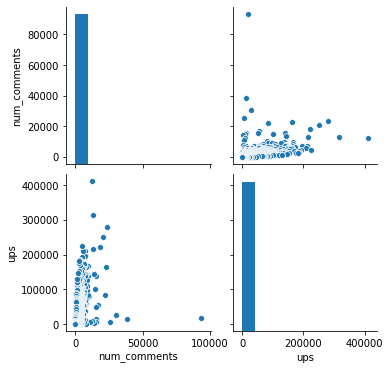

In [9]:
#what if we plot comments vs ups now?
sns.pairplot(data = wsbcut[wsbcut.ups >= 20][[ 'num_comments',  'ups']])

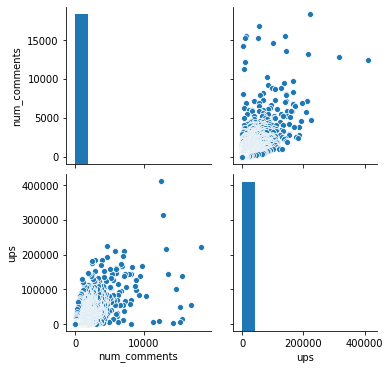

In [10]:
#8 or so outliers over 20,000 comments. delete those
sns.pairplot(data = wsbcut.loc[(wsbcut.ups>=10) & (wsbcut.num_comments<=20000)][[ 'num_comments',  'ups']])

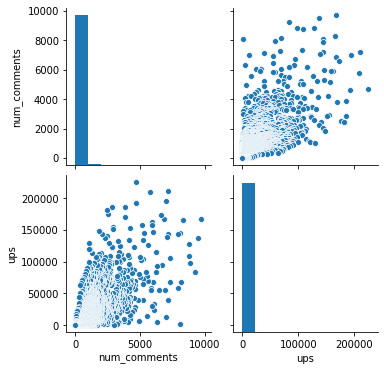

In [11]:
#okay, another 14ish outliers. I am okay with ignoring 22 exceptional posts
sns.pairplot(data = wsbcut.loc[(wsbcut.ups>=10) & (wsbcut.num_comments<=10000)][[ 'num_comments',  'ups']])

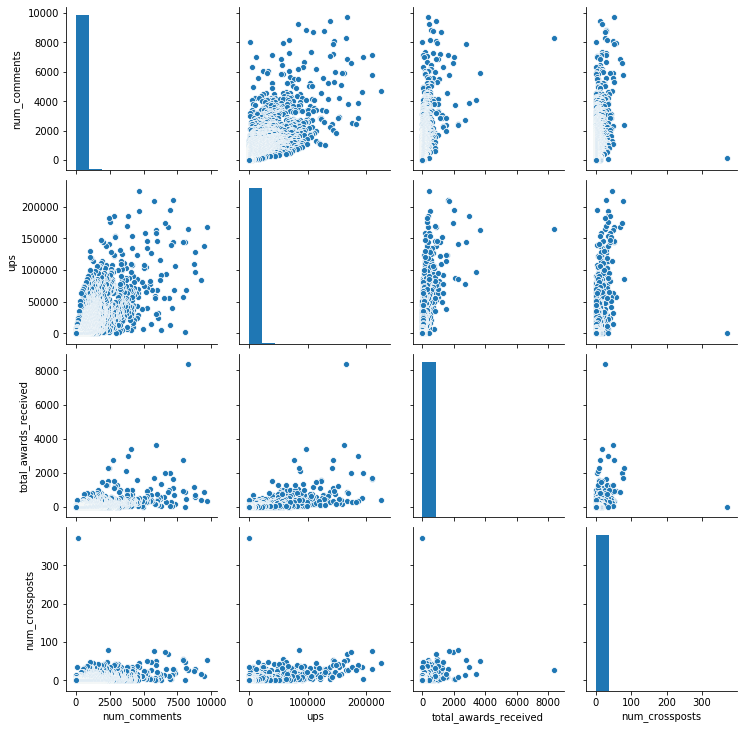

In [12]:
#that looks much more reasonable! let's do all the pairplots
sns.pairplot(data = wsbcut.loc[(wsbcut.ups>=10) & (wsbcut.num_comments<=10000)][[ 'num_comments',  'ups', 'total_awards_received', 'num_crossposts']])

In [13]:
#we might consider throwing out the outliers for num_crossposts and total_awards_received, too. let's try it

In [14]:
wsbcut.sort_values(by=['num_crossposts'],ascending=False)

,Unnamed: 0,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
104844,104844,A Comprehensive Analysis of the Continued Bear...,None,2020-04-19 20:26:32,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.70,117,2,150,371,True,False,False,g4erh0,1.587328e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",NaN
400221,100949,THE BIGGEST SHORT SQUEEZE IN THE WORLD $SLV Si...,jjalaj30,2021-01-27 16:41:18,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.87,14190,723,15499,101,True,False,False,l68ill,1.611766e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_6b6401hs
1225744,926472,GME YOLO update — Apr 16 2021 — final update,DeepFuckingValue,2021-04-16 20:20:13,NaN,https://i.redd.it/n7m08253glt61.png,0.92,144406,23446,13583,91,False,False,False,msblc3,1.618604e+09,NaN,t2_49l8qytq
708272,409000,Times Square right now,SomeGuyInDeutschland,2021-01-30 18:00:38,NaN,https://v.redd.it/x64z70f7eie61,0.98,411137,3510,12445,86,False,True,False,l8rf4k,1.612030e+09,NaN,t2_cxhbp
1239565,940293,Why am I still holding? I'm an Apeman.,Dotton_Creative,2021-04-24 06:27:56,NaN,https://v.redd.it/mu838r04f2v61,0.85,86120,2261,2384,80,False,True,False,mxe7dz,1.619246e+09,NaN,t2_a1rfjq16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293001,293001,Today Bill Gates has blessed LGVW/BFLY 🦋🚀🚀🚀🚀🚀🚀...,SnooPaintings8503,2020-12-23 15:57:33,NaN,https://i.redd.it/ncmbvu2nly661.jpg,1.00,1,0,1,0,False,False,False,kivkot,1.608739e+09,NaN,t2_5w452hpu
115595,115595,When you invest in the wrong company but still...,None,2020-05-01 17:29:13,[deleted]\n,https://i.redd.it/gl50fw4vu6w41.jpg,0.25,0,0,1,0,False,False,False,gbmf83,1.588354e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN
360307,61035,I made a graph that shows how GME squeeze shou...,None,2021-01-25 01:41:36,[deleted]\n,https://i.redd.it/e1qn7ubwrdd61.png,1.00,2,0,1,0,False,False,False,l4cyy1,1.611539e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN
208383,208383,I don't need magic lines on a chart to tell me...,Slow_Resolution,2020-09-05 21:22:38,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,1,0,True,False,False,in9a7v,1.599341e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_bxfjdx2


In [15]:
wsbcut.sort_values(by=['total_awards_received'],ascending=False)

,Unnamed: 0,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
1225744,926472,GME YOLO update — Apr 16 2021 — final update,DeepFuckingValue,2021-04-16 20:20:13,NaN,https://i.redd.it/n7m08253glt61.png,0.92,144406,23446,13583,91,False,False,False,msblc3,1.618604e+09,NaN,t2_49l8qytq
1074601,775329,GME YOLO update — Feb 19 2021,DeepFuckingValue,2021-02-19 21:05:55,NaN,https://i.redd.it/2xswz0h11ii61.png,0.95,215962,14968,13220,58,False,False,False,lnqgz8,1.613769e+09,NaN,t2_49l8qytq
1148149,848877,GME YOLO update — Mar 8 2021,DeepFuckingValue,2021-03-08 21:08:31,NaN,https://i.redd.it/9jfy2u8bdvl61.png,0.93,165366,8360,8289,26,False,False,False,m0q5bm,1.615238e+09,NaN,t2_49l8qytq
434634,135362,GME YOLO update — Jan 28 2021,DeepFuckingValue,2021-01-28 21:06:23,NaN,https://i.redd.it/opzucppb15e61.png,0.97,280425,8221,23712,35,False,False,False,l78uct,1.611868e+09,NaN,t2_49l8qytq
588378,289106,GME YOLO month-end update — Jan 2021,DeepFuckingValue,2021-01-29 21:04:45,NaN,https://i.redd.it/r557em3t5ce61.png,0.97,251664,4863,20592,32,False,False,False,l846a1,1.611954e+09,NaN,t2_49l8qytq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14557,14557,Accidently bought credit spreads against Papa ...,Alifox_2,2020-02-05 15:42:13,NaN,https://i.redd.it/de1lemwdl4f41.jpg,1.00,1,0,1,0,False,False,False,ezbddz,1.580917e+09,NaN,t2_1k32jtry
232713,232713,4 months of losing money wiped away. Finally e...,iamgreeneggsandsam,2020-10-14 17:33:57,NaN,https://i.redd.it/w09qg161j3t51.jpg,1.00,1,0,1,0,False,False,False,jb5c49,1.602697e+09,NaN,t2_5wccca5
378614,79342,New here👋🏻 why is everyone saying bots to thos...,NoTourist25,2021-01-27 20:15:33,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.50,0,0,1,0,True,False,False,l6dc3v,1.611779e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_6cbepg5n
396715,97443,NAKD going way north$$$,inkcartridge901XL,2021-01-27 17:04:55,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.36,0,0,1,0,True,False,False,l693dd,1.611767e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_5tujkzh7


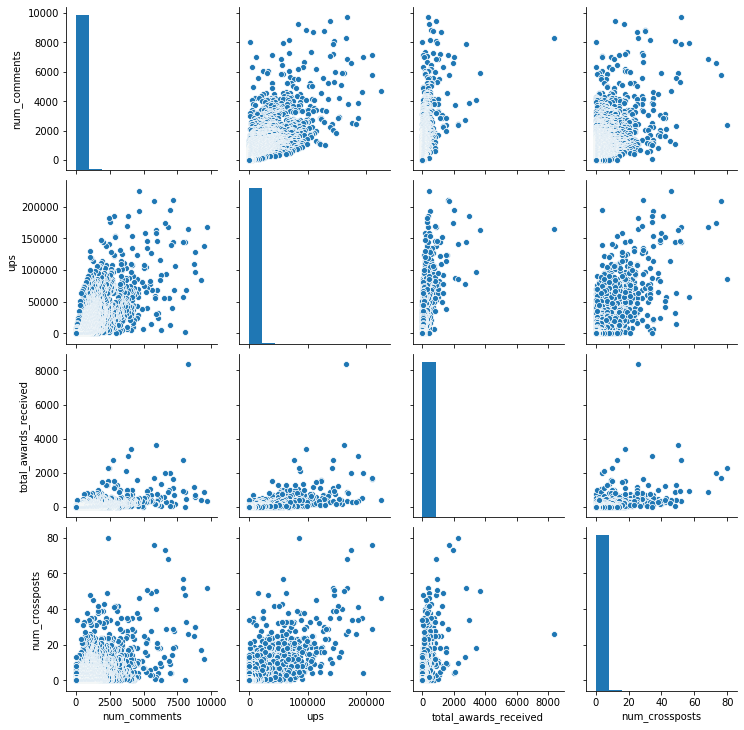

In [16]:
#remove ID g4erh0 and msblc3 and the comment outliers
#also remove posts nobody noticed
wsb_no_outliers=wsbcut.loc[(wsbcut.id != "g4erh0") & (wsbcut.id != "msblc3") & (wsbcut.ups>=10) & (wsbcut.num_comments<=10000)]
sns.pairplot(data = wsb_no_outliers[[ 'num_comments',  'ups', 'total_awards_received', 'num_crossposts']])

In [17]:
#could keep cutting, remove award outliers, etc. Maybe let's not bother: there's no reason to think highly awarded posts aren't interesting
#let's just go back and remove the comment outliers, plus the ones that don't get noticed
wsb2=wsbcut.loc[(wsbcut.ups>=10) & (wsbcut.num_comments<=10000)]

In [18]:
wsb2.head()

,Unnamed: 0,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
706590,407318,WE HAVE MORE POWER THAN ANYONE AMC GME 🚀🚀🚀🚀🚀🚀 ...,None,2021-01-30 18:36:02,[deleted]\n,https://i.redd.it/tv61zizjkie61.jpg,0.91,167740,373,9714,52,False,False,False,l8s98l,1.612032e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN
447300,148028,YOU RETARDS ARE ACTUALLY HOLDING THE LINE!!!! ...,liftingtailsofcats,2021-01-28 19:48:39,NaN,https://i.redd.it/k7t143dkn4e61.jpg,0.92,137862,889,9479,12,False,False,False,l76oiz,1.611863e+09,NaN,t2_116mc2
776398,477126,Elite Billionaires Scare-Mongering the public ...,None,2021-01-31 09:09:41,[deleted]\n,https://i.redd.it/sw6zi2bcwme61.png,0.95,83792,428,9226,17,False,False,False,l98r5q,1.612084e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN
712296,413024,I get it now. I completely understand why nobo...,None,2021-01-30 16:35:12,[deleted]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.94,97179,566,8824,30,True,False,False,l8pegt,1.612025e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN
694562,395290,"Cool, but why would they bother telling us?",Fargraven,2021-01-30 22:43:28,NaN,https://i.redd.it/d59d324psje61.jpg,0.93,128246,684,8795,30,False,False,False,l8xsfa,1.612047e+09,NaN,t2_cxvua


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(wsb2['num_comments'], wsb2['ups'], test_size=0.2, random_state=403)
reg=LinearRegression(copy_X=True)
reg.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
r2_score(y_train,reg.predict(np.array(X_train).reshape(-1,1)))

0.5991095359623252

In [30]:
r2_score(y_test,reg.predict(np.array(X_test).reshape(-1,1)))

0.5752743513128427

In [23]:
import matplotlib.pyplot as plt

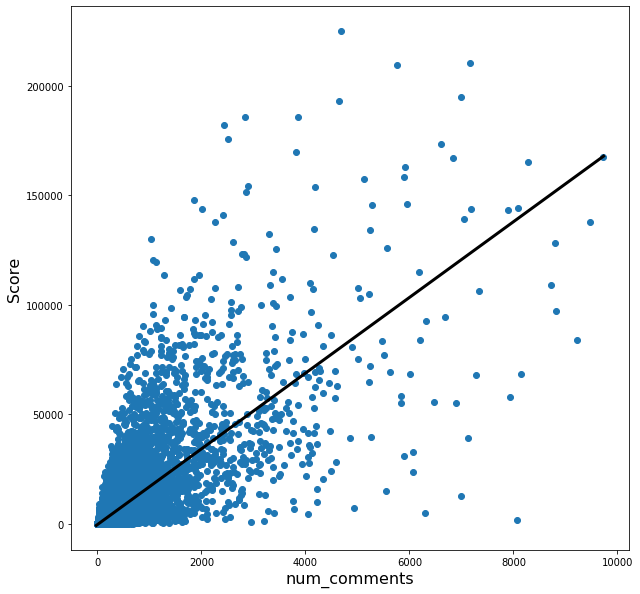

In [24]:
#quick plot with regression line

cov = wsb2[['ups','num_comments']].cov().iloc[0,1]
var = wsb2.num_comments.var()

beta_1_hat = reg.coef_[0]
beta_0_hat = reg.intercept_

min_c = wsb2.num_comments.min()
max_c = wsb2.num_comments.max()
padding = 20
x = np.linspace(min_c - padding,max_c + padding,1000)

plt.figure(figsize = (10,10))
plt.scatter(wsb2.num_comments, wsb2.ups)

plt.plot(x,
            beta_0_hat + beta_1_hat*x, 'k',
            linewidth = 3)

plt.xlabel("num_comments", fontsize =16)
plt.ylabel("Score", fontsize = 16)

# type this to show the plot
plt.show()

In [25]:
#how bad is it if we just don't remove the outliers?
wsb3=wsbcut.loc[(wsbcut.ups>=10)]
reg=LinearRegression(copy_X=True)
reg.fit(np.array(wsb3['num_comments']).reshape(-1,1),wsb3['ups'])
r2_score(wsb3['ups'],reg.predict(np.array(wsb3['num_comments']).reshape(-1,1)))

0.294928242568243